# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - Colab 및 Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집


### 의료 데이터 분석의 현재


### Accuracy, Precision, 그리고 Recall

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
# python의 os 패키지를 통해 환경설정을 해주는 것.
os.environ['KAGGLE_USERNAME']='ollpp123'
os.environ['KAGGLE_KEY']='896ca0560b1f3969da56dd4829e56640'



### 문제 2. 데이터 다운로드 및 압축 해제하기


In [5]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
# kaggle 홈페이지에서 data api를 가져오는 명령어

!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 3.72MB/s]


In [6]:
# kaggle 홈페이지에서 받은 데이터 압축 풀기

!unzip '*.zip'

Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [7]:
# list를 조회하여 다운로드 받은 파일을 확인할 수 있다.
# 압축해제한 파일도 조회 가능
# 디렉토리 안에 있는 정보들 모두 조회

!ls

heart-failure-clinical-data.zip		    sample_data
heart_failure_clinical_records_dataset.csv


In [1]:
# GPU 확인하는 코드

!nvidia-smi

Mon Feb  1 22:20:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [8]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [9]:
# 가져온 csv파일 확인

df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [10]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())

# age는 integer로 적혀있는것을 볼 수 있다. 
# anaemia 에서 0과 1의 의미를 확인할 수 있다. 
# diabetes를 통해 당뇨 여부를 확인할 수 있다.

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
# data_Type과 null여부를 볼 수 있다.
# float, int 형을 확인할 수 있다.(Dtype)
# Dtype이 정확하지 않은 경우 object라고 나와있는 경우도 있다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [12]:
# 수치형 데이터의 형태를 보여준다.
# count : 갯수
# max값 또는 min값으로 이상값을 예측해 볼 수 있다.(rough하게)

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 문제 5. 수치형 데이터의 히스토그램 그리기


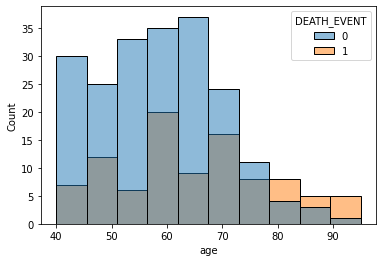

In [14]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기


sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)

# hue와 kde를 사용하여 좀 더 유연한 히스토그램을 그릴 수 있다.

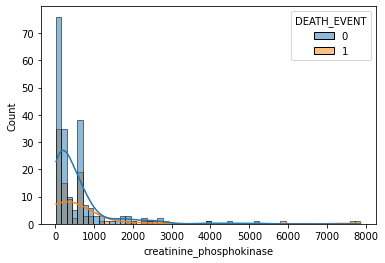

In [15]:
sns.histplot(x='creatinine_phosphokinase', data=df, hue='DEATH_EVENT', kde=True)

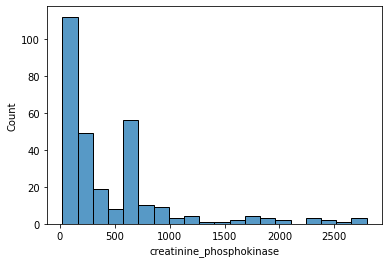

In [16]:
# 3000 이하의 자료들만 보여주기

sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

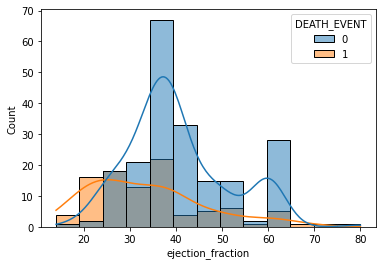

In [17]:
# bins를 통해 x축 간격을 조정하여 비어있는 공간을 없애줄 수 있다.

sns.histplot(x='ejection_fraction', data=df, bins=13, hue='DEATH_EVENT', kde=True)

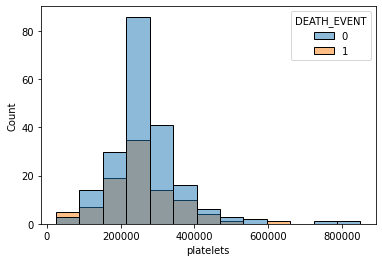

In [18]:
# 혈소판은 death_event와 관련이 없어 보인다.

sns.histplot(x='platelets', data=df, bins=13, hue='DEATH_EVENT')

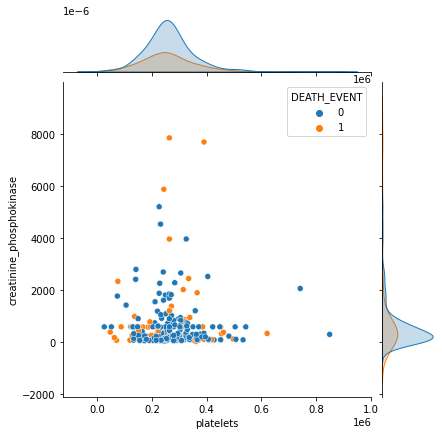

In [19]:
# scatter_plot과 histogram_plot을 보여준다.

sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df)

### 문제 6. Boxplot 계열을 이용하여 범주별 통계 확인하기


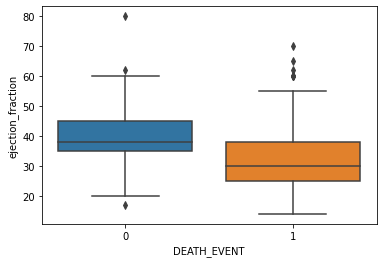

In [20]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
# Hint) hue 키워드를 사용하여 범주 세분화 가능

# box_plot은 outline을 밖으로 보여준다.

sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)


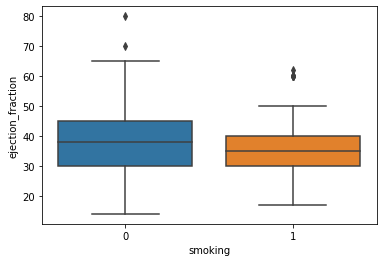

In [21]:
# smoking여부에 따른 ejection_fraction

sns.boxplot(x='smoking', y='ejection_fraction', data=df)

# 두 값의 평균의 차이는 거의 없다. 
# ejection_fraction의 값의 범위가 작다는것을 알 수 있다.

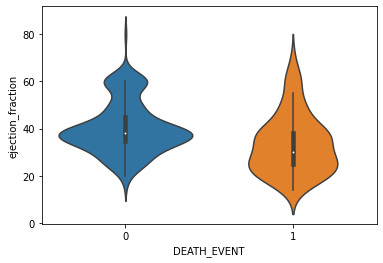

In [22]:
# violinplot --> histogram 정보 + boxplot 정보

sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


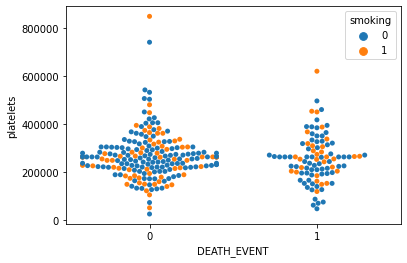

In [23]:
# swarmplot --> scatter plot + violin plot

sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)
# smoking이 두 x, y에서 얼마나 차지하는지 알 수 있다.

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [29]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기

# 수치형 데이터
X_num = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']]

# 범주형 데이터
X_cat = df[['anaemia','diabetes','high_blood_pressure', 'sex', 'smoking']]

# y 데이터
y = df['DEATH_EVENT']

In [37]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기

# scaler 생성
scaler = StandardScaler()
scaler.fit(X_num)

# skitlearn을 통해 fit 하면 numpy 바뀐다.
# 이런 경우, index 정보가 바뀌기 때문에 dataframe으로 다시 바꿔준다.
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
x = pd.concat([X_scaled, X_cat], axis=1)

x.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [35]:
from sklearn.model_selection import train_test_split

In [38]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기

# 다양한 parameter 가 존재.
# test_size : 크기
# train_size : 
# random_state : train과 test를 나누어 줄 때 랜덤하게 나누어주는 seed
# shuffle : 데이터가 섞여서 나오는지 아닌지

# test_size 를 0.3 으로 주면 train : test = 7 : 3 으로 매칭된다.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [39]:
from sklearn.linear_model import LogisticRegression

In [41]:
# LogisticRegression 모델 생성/학습

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 문제 10. 모델 학습 결과 평가하기


In [42]:
from sklearn.metrics import classification_report

In [44]:
# Predict를 수행하고 classification_report() 결과 출력하기

pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))



              precision    recall  f1-score   support

           0       0.86      0.92      0.89        64
           1       0.76      0.62      0.68        26

    accuracy                           0.83        90
   macro avg       0.81      0.77      0.78        90
weighted avg       0.83      0.83      0.83        90



### 문제 11. XGBoost 모델 생성/학습하기


In [45]:
from xgboost import XGBClassifier

In [46]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 문제 12. 모델 학습 결과 평가하기


In [47]:
# Predict를 수행하고 classification_report() 결과 출력하기


# 모델 학습결과를 평가
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))




              precision    recall  f1-score   support

           0       0.90      0.97      0.93        64
           1       0.90      0.73      0.81        26

    accuracy                           0.90        90
   macro avg       0.90      0.85      0.87        90
weighted avg       0.90      0.90      0.90        90



### 문제 13. 특징의 중요도 확인하기


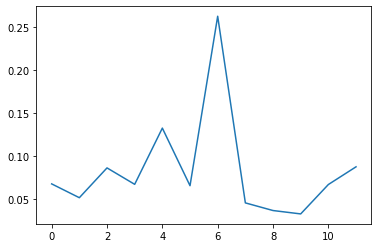

In [49]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot


imp = model_xgb.feature_importances_
plt.plot(imp)

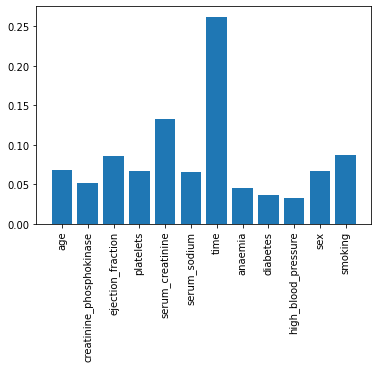

In [54]:
plt.bar(X.columns, imp)

# 겹쳐서 내용확인이 힘들어 90도 회전
plt.xticks(rotation=90)
plt.show()

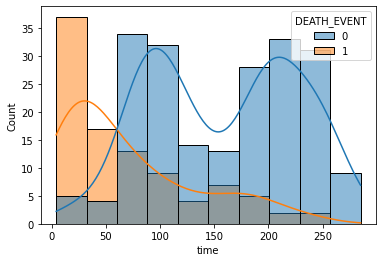

In [55]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)

# time은 death_event가 이미 속해있기 때문에 time을 배제하고 넘어가본다.
# 상위 x 수치, 범주형에서 time을 빼고 다시 진행해보면 accuracy가 줄어듬을 알 수 있다!!!

## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Precision-Recall 커브 확인하기

In [56]:
# Recall은 유지하면서 Precision을 얼마나 상향시킬수 있는지 확인하는것

from sklearn.metrics import plot_precision_recall_curve

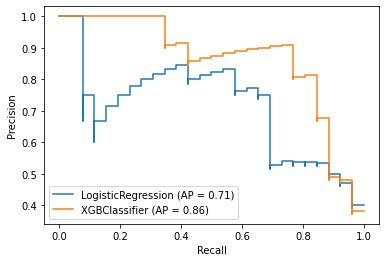

In [62]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)

# fig : 전체 캠퍼스(바탕)
fig = plt.figure()
# ax : figure를 먼저 만들어놓고, ax라는 동일한 x를 그려넣은것
ax = fig.gca()
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)


# 일반적으로 xgb가 더 좋은 성능을 갖고 있다고 생각할 수 있다. 

### 문제 15. ROC 커브 확인하기

In [63]:
from sklearn.metrics import plot_roc_curve

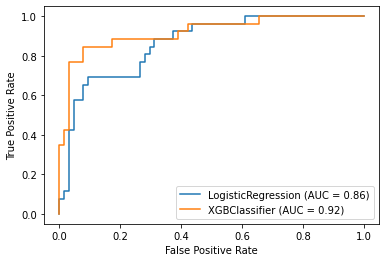

In [64]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)


fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)


# false positive rate를 낮을 떄 좋은 것